## Set the repository path

In [16]:
pyCPT_path = '/home/wang/PycharmProjects/pyMRF'

## Import modules

In [17]:
# Add the repository path into python path
import sys
sys.path.append(pyCPT_path)

# Import modules
import numpy as np
import pyHMRF
import pyCPT
import post_process
import pre_process

## Read the NGES dataset

In [18]:
datapath = pyCPT_path + '/test_data/NGES_data.csv'
cpt = pyCPT.read_cpt_data(datapath)
print('Number of data points:  ' + str(cpt.phys_shp))

Number of data points:  [296]


## Identify the optimal number of soil states

Fitting model with number of components =  1
Fitting model with number of components =  2
Fitting model with number of components =  3
Fitting model with number of components =  4
Fitting model with number of components =  5
Fitting model with number of components =  6
Fitting model with number of components =  7
Fitting model with number of components =  8
Fitting model with number of components =  9
Fitting model with number of components =  10


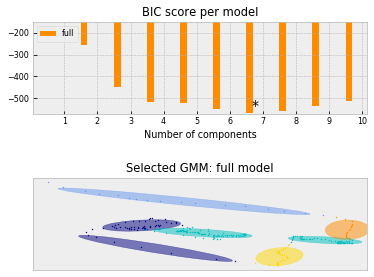

In [19]:
# mod_sel : the model selection result, 
# mod_sel[0] = BIC list for different number of clusters
# mod_sel[1] = the optimal number of clusters
mod_sel = pre_process.model_selection(cpt.feat, 10, plot=True)

## Extract soil segments

In [20]:
pyCPT.segmentation(cpt, n=200, n_labels=mod_sel[1], start_iter=100)

Fitting the initial Gaussian mixture model...


  0%|          | 1/200 [00:00<00:26,  7.43it/s]

Fitting is done!


100%|██████████| 200/200 [00:28<00:00,  7.10it/s]


## Soil interpretation

In [21]:
layer_info = pyCPT.detect_layers(cpt)

## Visualization

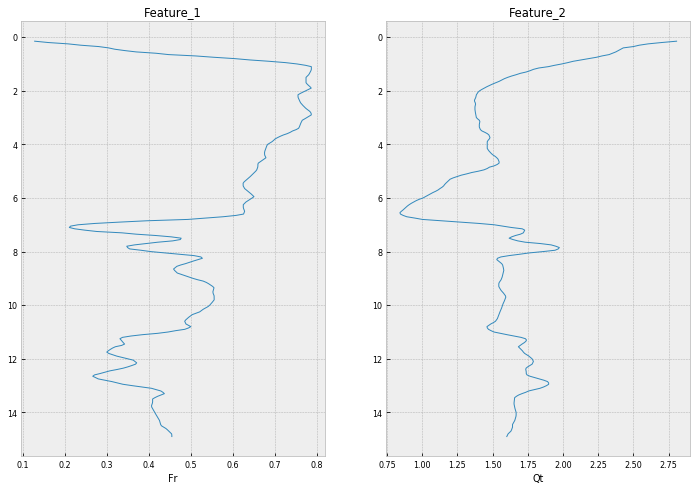

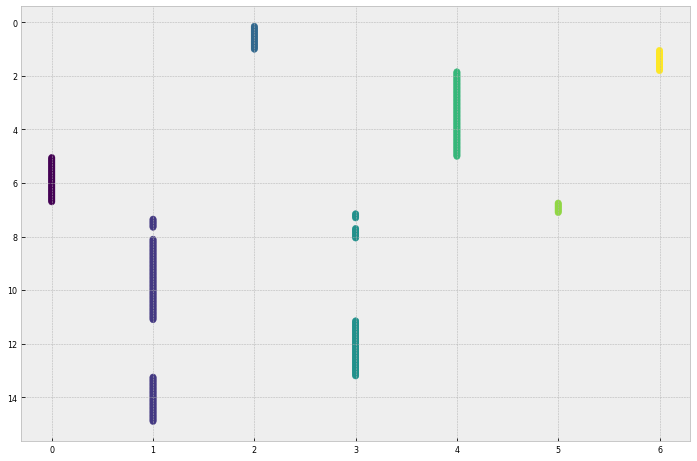

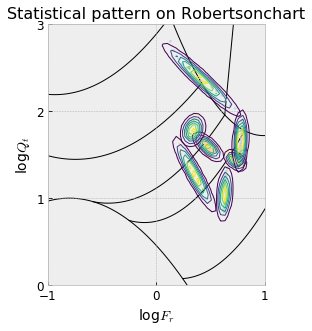

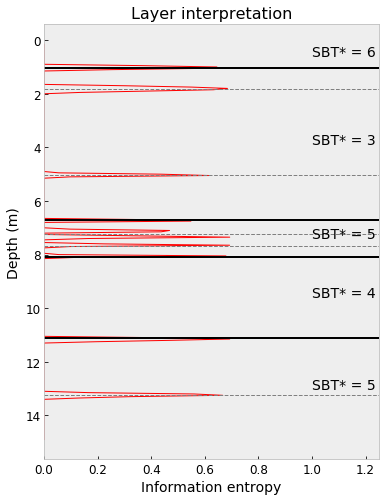

In [22]:
post_process.plot_feature(cpt,xlabel=['Fr','Qt'], scatter=False) # show the CPT data
post_process.plot_image(cpt, cpt.label_map_est) # show the spatial pattern
pyCPT.mixture_plot_robertsonchart(cpt, aspect=0.8) # show the statistical pattern
pyCPT.plot_layers(cpt, layer_info) # show the soil layers